# Lab 3: Choose Two Variables 

# Please read the variable info at 'readme.html', and choose at least two sets of variables to analyze including but not limited to, showing their basic statistic and visualization.
# Brief explain what you found. For example, you can show correlation between several variables and explain why their relation make sense, or discover skewness, outlier etc for certain variables.

In [24]:
import seaborn as sns
from sklearn.datasets import load_iris
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import numpy as np
import random

## Read in the datasets and extract a subset for each

In [25]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "FlightDate", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

total_rows = sum(1 for _ in open('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')) - 1
sample_size = 100000
skip_indices = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

reader = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',
    usecols=use_cols,
    skiprows=skip_indices,
    chunksize=1000
)
df = pd.concat([chunk for chunk in reader])

## Data Analysis for the Two Variables 

## Arrival Delay Vs. Departure Delay

In [26]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,4,5,1/4/2019,OO,N932SW,5658,IAH,XNA,...,0,103.0,109.0,76.0,438,NaN,NaN,NaN,NaN,NaN
1,2019,1,4,5,1/4/2019,OO,N107SY,5660,MKE,DEN,...,0,184.0,163.0,127.0,896,NaN,NaN,NaN,NaN,NaN
2,2019,1,4,5,1/4/2019,OO,N114SY,5661,SEA,SFO,...,0,136.0,134.0,110.0,679,NaN,NaN,NaN,NaN,NaN
3,2019,1,4,5,1/4/2019,OO,N925SW,5667,SBP,SFO,...,0,74.0,85.0,37.0,190,NaN,NaN,NaN,NaN,NaN
4,2019,1,4,5,1/4/2019,OO,N152SY,5669,SLC,DEN,...,0,87.0,78.0,58.0,391,NaN,NaN,NaN,NaN,NaN


In [27]:
# Analysing the two variables 
# .descripe() gives basic stats like (mean, standard deviation, minimum, percentile/quartiles

variable_cols = ['DepDelay', 'ArrDelay']
variable_stats = df[variable_cols].describe()
print("Basic statistics for delay variables:\n", variable_stats)

Basic statistics for delay variables:
            DepDelay      ArrDelay
count  97206.000000  96948.000000
mean       9.760478      4.318428
std       50.080200     52.824754
min      -41.000000    -73.000000
25%       -6.000000    -16.000000
50%       -3.000000     -7.000000
75%        5.000000      7.000000
max     1651.000000   1638.000000


# Data Plots

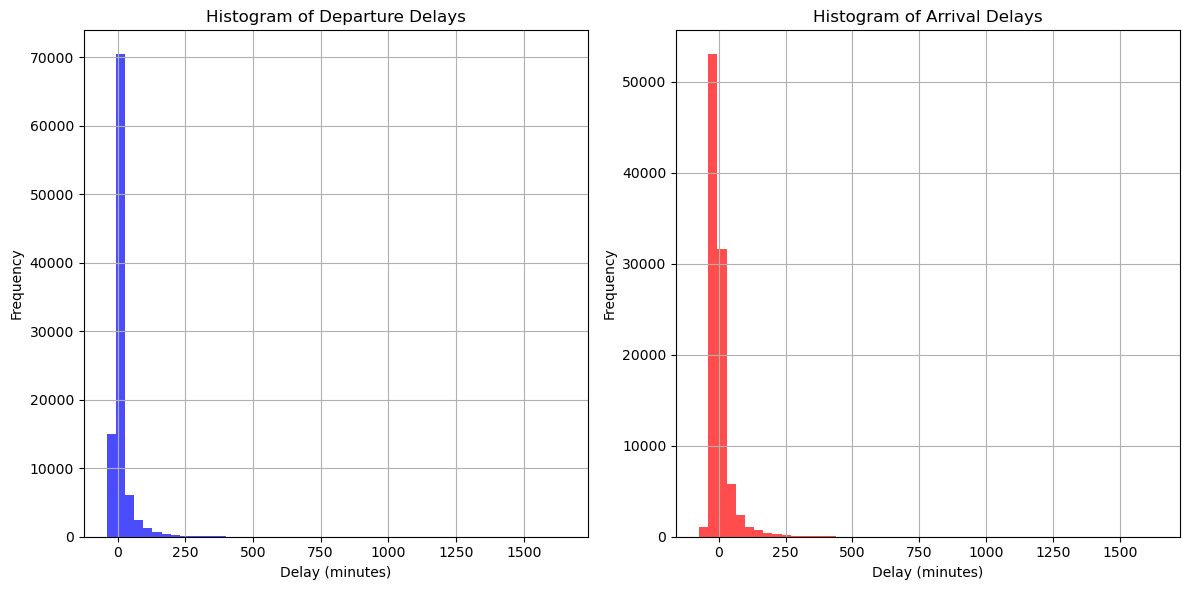

In [28]:
# import matplotlib.pyplot as plt

#plot histogram for Departure and Arrival Delays
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['DepDelay'].hist(bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

#plot histogram for Arrival Delays
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
df['ArrDelay'].hist(bins=50, color='red', alpha=0.7)
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


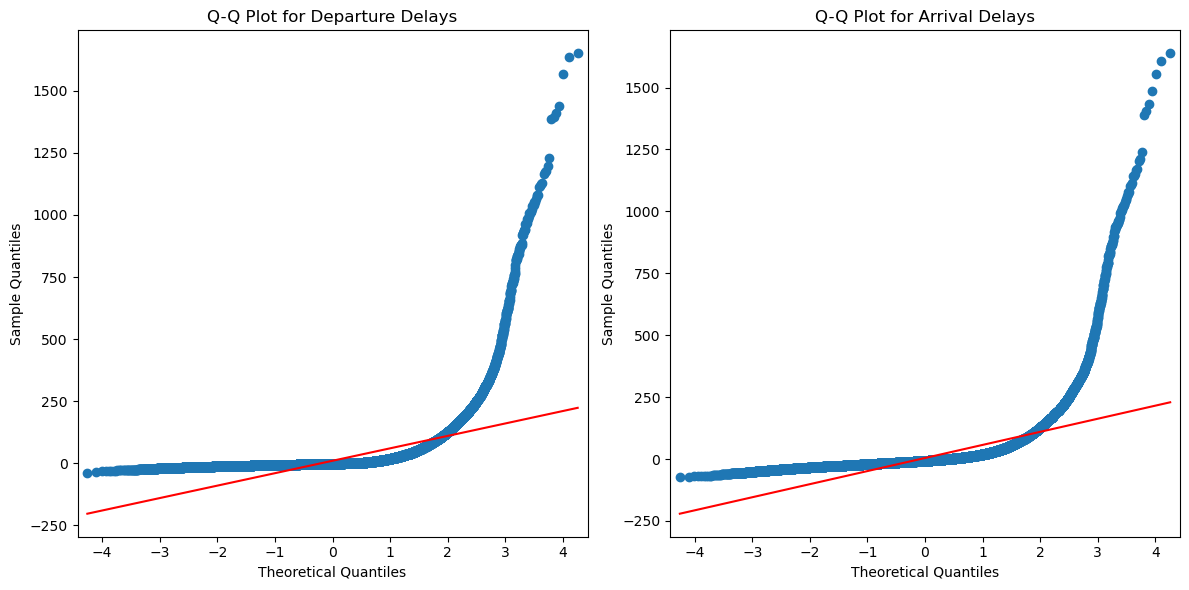

In [29]:
# Plot Q-Q plot for Departure Delays
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
qqplot(df['DepDelay'].dropna(), line='s', ax=plt.gca())  # 's' for standard line
plt.title('Q-Q Plot for Departure Delays')

# Plot Q-Q plot for Arrival Delays
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
qqplot(df['ArrDelay'].dropna(), line='s', ax=plt.gca())
plt.title('Q-Q Plot for Arrival Delays')

plt.tight_layout()
plt.show()


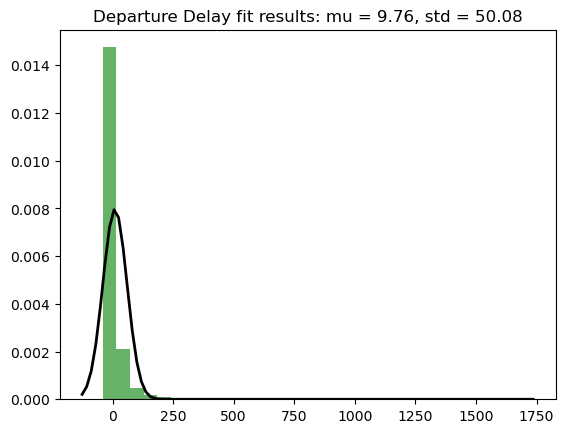

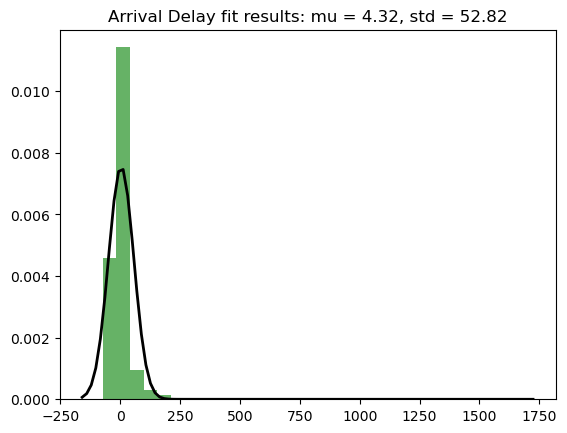

In [30]:
#normal distribution 

def plot_normal_fit(df, title):
    # Drop NA values for clean plotting
    data = df.dropna()
    # Mean and standard deviation of the data
    mu, std = norm.fit(data)
    
    # Plot histogram
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
    
    # Plot the normal distribution with the same mean and standard deviation
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'k', linewidth=2)
    title = f"{title} fit results: mu = {mu:.2f}, std = {std:.2f}"
    plt.title(title)
    plt.show()

# Assuming df is your DataFrame and it contains 'DepDelay' and 'ArrDelay' columns
plot_normal_fit(df['DepDelay'], 'Departure Delay')
plot_normal_fit(df['ArrDelay'], 'Arrival Delay')


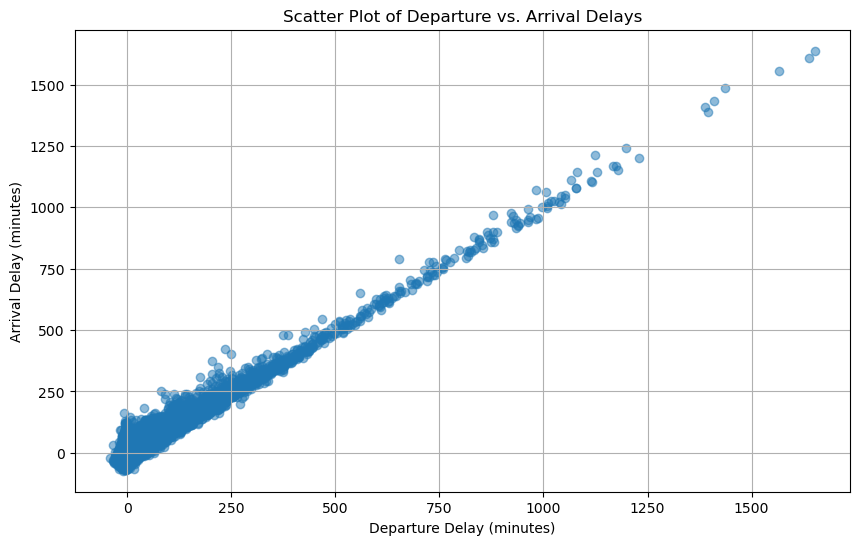

In [31]:
# scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(df['DepDelay'], df['ArrDelay'], alpha=0.5)
plt.title('Scatter Plot of Departure vs. Arrival Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()


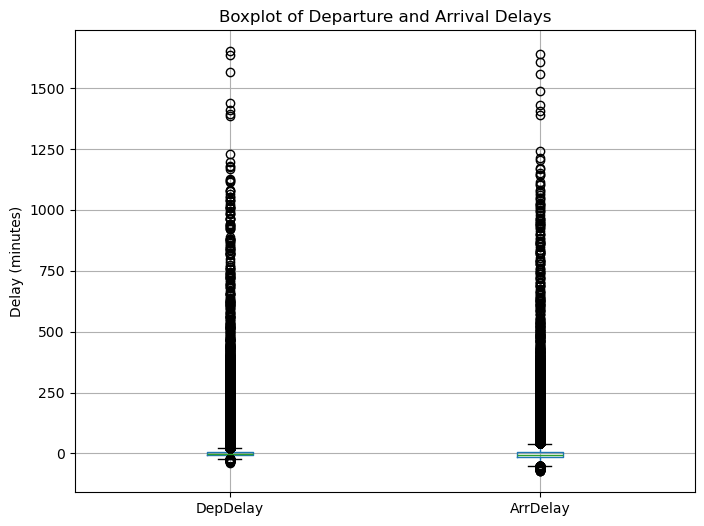

In [32]:
# boxplot plot

plt.figure(figsize=(8, 6))
df.boxplot(column=['DepDelay', 'ArrDelay'])
plt.title('Boxplot of Departure and Arrival Delays')
plt.ylabel('Delay (minutes)')
plt.show()


In [33]:
# # Compute the correlation matrix
# corr = df[['DepDelay', 'ArrDelay']].corr()

# # Generate a heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap between Departure and Arrival Delays')
# plt.show()


# Data Analysis 

# Interpretation of plots


#### 1. **Histograms with Normal Curve**
The histograms for both departure and arrival delays show a mismatch with the normal distribution curve, showing narrow peaks and long tails to the right. This indicates most flights are on time or slightly delayed, with a significant number experiencing larger delays.

#### 2. **Scatter Plot**
The scatter plot demonstrates a positive correlation between departure and arrival delays, suggesting that flights that leave late also tend to arrive late. Points below the line y = x indicate some flights make up time during the flight.

#### 3. **Boxplot**
The boxplots reveal a right-skewed distribution for both types of delays, with the median delay being low and a large number of outliers indicating significant delays.

#### 4. **Q-Q Plots**
The points follow the reference line closely in the central part of the distribution (near the mean), which suggests that the middle range of the data is somewhat normally distributed.
However, the points dramatically deviate from the reference line in the tails, especially in the positive direction, which indicates a heavy-tailed distribution—there are more extreme values (long delays) than you would expect in a normal distribution.

## 5. **Conclusions from the Plots:**

1. **Non-Normal Distribution**: Both departure and arrival delays do not follow a normal distribution, suggesting that other distributions like log-normal may be more appropriate.

2. **Outliers and Extremes**: The presence of outliers indicates that while most flights are on time, a non-negligible number of flights experience very large delays, potentially due to operational, environmental, or systemic issues.

3. **Skewness**: Data is right-skewed, indicating that median values are more representative of central tendency than means, which are influenced by extreme delays.

4. **Statistical Analysis**: The non-normality and outliers suggest that non-parametric methods or data transformation techniques should be considered for statistical analysis.

5. **Operational Insights**: The analysis of outliers and skewness can provide actionable insights for airlines and airports to target the root causes of significant delays.

6. **Data Transformation**: For analyses requiring normality, applying log transformations or other techniques could help normalize the data, reducing skewness and improving the symmetry of the distribution.

By considering these plots and analyses, we can gain a comprehensive understanding of delay patterns, which can guide statistical methodology and potentially inform strategies to mitigate delays
